In [2]:
import sys 
sys.path.append('..')

In [3]:
from neural_networks.chessbot.chessbot import ChessBot
from neural_networks.chessbot.modelinput import ModelInput

In [47]:
import pickle
from search_tree.experiments.CNN.board_processing import Boardprocessing
# and later you can load it
with open('models_move\\move_prediction_logreg_V1.pkl', 'rb') as f:
    logregmod = pickle.load(f)

In [4]:
%load_ext autoreload
%autoreload 2
from search_tree.MCTS import MCTS

In [5]:
import keras
btf_single_input_model = keras.models.load_model('bin/btf/single_input_model/model')
btf_simple_input_model = keras.models.load_model('bin/btf/simple_input_model/model')
btf_triple_input_model = keras.models.load_model('bin/btf/triple_input_model/model')

owen_single_input_model = keras.models.load_model('bin/owen/single_input_model/model')
owen_simple_input_model = keras.models.load_model('bin/owen/simple_input_model/model')
owen_triple_input_model = keras.models.load_model('bin/owen/triple_input_model/model')

In [6]:
import chess
import chess.svg
from IPython.display import SVG, display
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

In [7]:

def play_game(black, white, should_visualise=False):
	board = chess.Board()

	if should_visualise:
		display(board)

	while not board.is_game_over(claim_draw=True):
		board.push(black.move(board) if board.turn == chess.BLACK else white.move(board))

		if should_visualise:
			clear_output(wait=True)
			display(board)
			time.sleep(0.5)

	result = board.outcome(claim_draw=True).result()
	print(result)

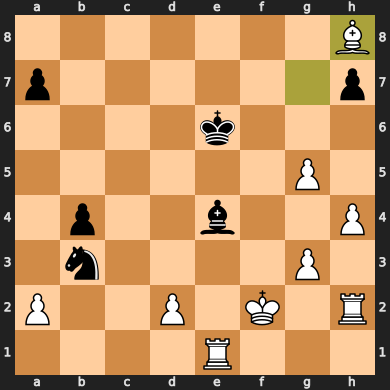

1/2-1/2


In [105]:
import chess
white = ChessBot(btf_simple_input_model, ModelInput('simple'), chess.WHITE, exploration_rate=0.0)
black = ChessBot(owen_simple_input_model, ModelInput('simple'), chess.BLACK, exploration_rate=0.0)
play_game(black, white, should_visualise=True)

In [6]:
board = chess.Board()
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K

output_owen_simple_input_model = owen_simple_input_model.predict(np.array([ModelInput('simple').get_input(board)]))



1/1 [==============================] - 0s 131ms/step


In [20]:
mcts = MCTS(max_time = 15, value_nn=btf_simple_input_model, model_input=ModelInput('simple'), use_heap=True)

In [8]:
from stockfish import Stockfish
import chess
import os

path = os.getcwd()+"\stockfish_15.1_win_x64_avx2\stockfish-windows-2022-x86-64-avx2.exe"
stockfish = Stockfish(path=path)
#stockfish.set_elo_rating(1150)
stockfish.set_elo_rating(1500)

tf_simple_input_model w/... bad tree

vs

... stockfish

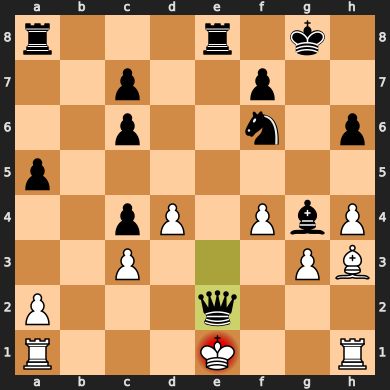

In [69]:
mcts = MCTS(max_time = 30, value_nn=btf_simple_input_model, model_input='simple', use_heap=True)
import chess
import random
board = chess.Board()
time_limit = 15
result = None
for i in range(100):
    if board.turn:
        result = None
        result = mcts.search(board)
        if result == None:
            break
        board.push(result)
    else:
        stockfish.set_fen_position(board.fen())
        stockfish_move = stockfish.get_best_move_time(1)
        board.push_uci(stockfish_move)


    clear_output(wait=True)
    display(board)
    time.sleep(3)

MCTS w/ heap

vs

model

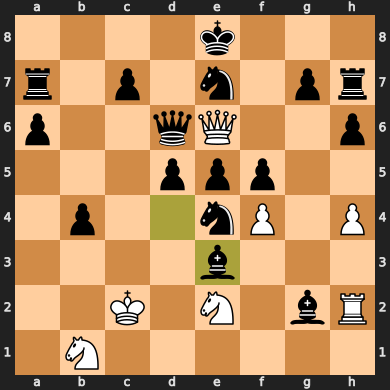

KeyboardInterrupt: 

In [10]:
mctsmodel = MCTS(max_time = 20, value_nn=btf_simple_input_model, model_input=ModelInput('simple'), use_heap=False)
mcts = MCTS(max_time = 40, use_heap=True)
model = ChessBot(btf_simple_input_model, ModelInput('simple'), chess.BLACK, exploration_rate=0.0)
import chess
import random
board = chess.Board()
time_limit = 15
result = None
for i in range(200):
    if board.turn:
        result = None
        result = mctsmodel.search(board)
        if result == None:
            break
        board.push(result)
    else:
        try:
            board.push(model.move(board))
        except:
            break

    clear_output(wait=True)
    display(board)
    time.sleep(3)

mcts model w/o heap

vs

mcts w/heap

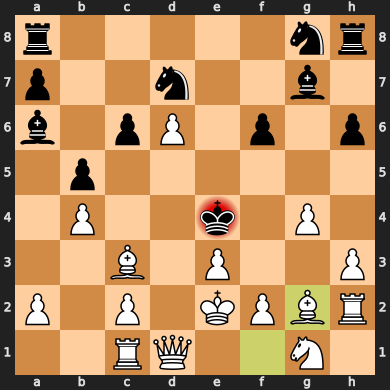

In [64]:
mctsmodel = MCTS(max_time = 2, value_nn=btf_simple_input_model, model_input='simple', use_heap=False)
mcts = MCTS(max_time = 2, use_heap=True)

import chess

for i in range(100):
    board.push(random.choice(list(board.legal_moves)))

board = chess.Board()
time_limit = 15
result = None
for i in range(50):
    result = None
    if board.turn:
        result = mcts.search(board)
    else:
        result = mctsmodel.search(board)
    if result == None:
        break
    board.push(result)

    clear_output(wait=True)
    display(board)
    time.sleep(3)

btf_simple_input w/ heap

vs

mcts w/ heap

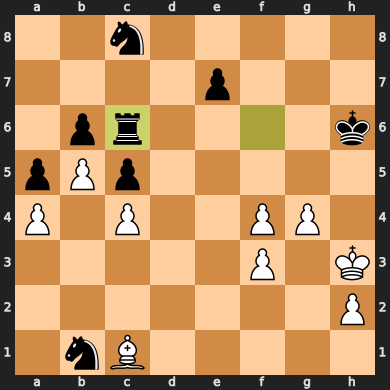

In [14]:
mctsmodel = MCTS(max_time = 2, value_nn=btf_simple_input_model, model_input=ModelInput('simple'), use_heap=True)
mcts = MCTS(max_time = 2, use_heap=True)

import chess

board = chess.Board()
time_limit = 15
result = None
for i in range(100):
    result = None
    if board.turn:
        result = mcts.search(board)
    else:
        result = mctsmodel.search(board)
    if result == None:
        break
    board.push(result)

    clear_output(wait=True)
    display(board)
    time.sleep(3)

tree search with heap

vs 

... stockfish

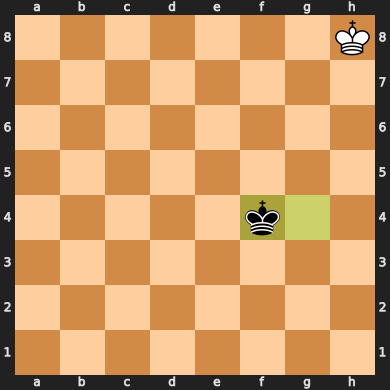

In [70]:
# 
mcts = MCTS(max_time = 60, use_heap=True)
import random
board = chess.Board()
time_limit = 15
result = None
for i in range(200):
    if board.turn:
        result = None
        result = mcts.search(board)
        if result == None:
            break
        board.push(result)
    else:
        stockfish.set_fen_position(board.fen())
        stockfish_move = stockfish.get_best_move_time(1)
        board.push_uci(stockfish_move)


    clear_output(wait=True)
    display(board)
    time.sleep(3)

tree search w/ model w/ hybrid rollout w/ heap

vs 
*
stockfish   

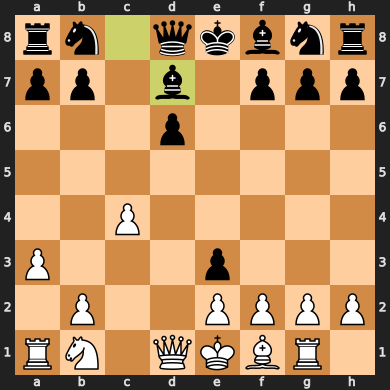

KeyboardInterrupt: 

In [8]:
%load_ext autoreload
%autoreload 2
import chess
from search_tree.MCTS import MCTS
mcts = MCTS(max_time = 100, value_nn=owen_simple_input_model,value_nn_2=btf_simple_input_model, model_input='simple', use_heap=False)

import random
board = chess.Board()
result = None
for i in range(500):
    if board.turn:
        result = None
        
        result = mcts.search(board)
        if result == None:
            break
        board.push(result)
    else:
        stockfish.set_fen_position(board.fen())
        stockfish_move = stockfish.get_best_move_time(10)
        board.push_uci(stockfish_move)


    clear_output(wait=True)
    display(board)

In [98]:
import numpy as np
board = chess.Board()
board.push_uci("e2e4")
modelinput = ModelInput(input_type='simple')
value = owen_simple_input_model.predict(np.array([ModelInput(input_type='simple').get_input(board)]))
value[0][0]

1/1 [==============================] - 0s 23ms/step


0.52780145

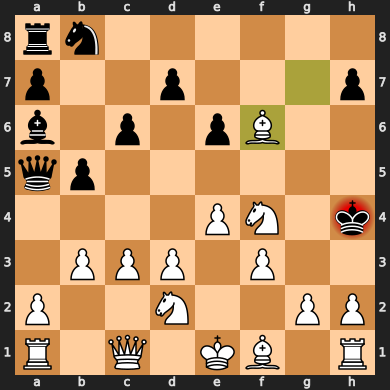

In [127]:
mctsmodel = MCTS(max_time = 2, value_nn=btf_simple_input_model, model_input='simple', use_heap=True)
mcts = MCTS(max_time = 2, use_heap=True)

import chess

board = chess.Board()
time_limit = 15
result = None
for i in range(100):
    result = None
    if board.turn:
        result = mcts.search(board)
    else:
        result = mctsmodel.search(board)
    if result == None:
        break
    board.push(result)

    clear_output(wait=True)
    display(board)
    time.sleep(3)

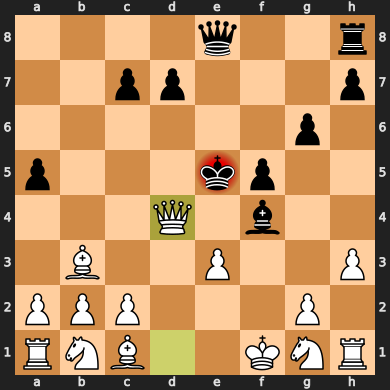

In [135]:
mctsmodel = MCTS(max_time = 10, value_nn=btf_simple_input_model, model_input='simple', use_heap=False)
mcts = MCTS(max_time = 10, use_heap=False)

import chess

board = chess.Board()
time_limit = 15
result = None
for i in range(100):
    result = None
    if board.turn:
        result = mcts.search(board)
    else:
        result = mctsmodel.search(board)
    if result == None:
        break
    board.push(result)

    clear_output(wait=True)
    display(board)
    time.sleep(3)